In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlwt

In [ ]:
!gdown --id 1bb2irg5nFZhoFkpjWPQHJPBBr8FiK8l7

Downloading...
From: https://drive.google.com/uc?id=1bb2irg5nFZhoFkpjWPQHJPBBr8FiK8l7
To: /content/restoran.xlsx
100% 10.5k/10.5k [00:00<00:00, 8.06MB/s]


In [ ]:
dataRestoran = pd.read_excel('restoran.xlsx')
print(dataRestoran)
titikPelayanan = [25,37,58,65,78,89,101] #akan menghasilkan nilai kelayakan yang lebih bervariasi
titikMakanan = [3,5,8,11]

     id  pelayanan  makanan
0     1         58        7
1     2         54        1
2     3         98        2
3     4         52        4
4     5         11        4
..  ...        ...      ...
95   96         30        1
96   97         25        3
97   98         27       10
98   99          8        6
99  100         11        8

[100 rows x 3 columns]


In [ ]:
def trapesium(x,a,b,c,d):
  nilaiKeanggotaan = 0
  if x <= a or x>=d:
    nilaiKeanggotaan = 0
  elif a < x < b:
    nilaiKeanggotaan = (x-a)/(b-a)
  elif b<=x<c:
    nilaiKeanggotaan = 1
  elif c <= x < d:
    nilaiKeanggotaan = -(x-d)/(d-c)
  
  return nilaiKeanggotaan

def segitiga(x,a,b,c):
  nilaiKeanggotaan = 0
  if x <= a or x>=c:
    nilaiKeanggotaan = 0
  elif a < x <= b:
    nilaiKeanggotaan = (x-a)/(b-a)
  elif b<x<=c:
    nilaiKeanggotaan = -(x-c)/(c-b)
  
  return nilaiKeanggotaan

In [ ]:
def keanggotaanPelayanan(x):
  kurang= trapesium(x,-1,0,titikPelayanan[0],titikPelayanan[1])
  cukup = trapesium(x,titikPelayanan[0],titikPelayanan[1],titikPelayanan[2],titikPelayanan[3])
  bagus = trapesium(x,titikPelayanan[2],titikPelayanan[3],titikPelayanan[4],titikPelayanan[5])
  sangatBagus = trapesium(x,titikPelayanan[4],titikPelayanan[5],titikPelayanan[6],titikPelayanan[6])
  return kurang,cukup,bagus,sangatBagus

def keanggotaanMakanan(x):
  kurangEnak = trapesium(x,-1,0,titikMakanan[0],titikMakanan[1])
  enak = segitiga(x,titikMakanan[0],titikMakanan[1],titikMakanan[2])
  sangatEnak = trapesium(x,titikMakanan[1],titikMakanan[2],titikMakanan[3],titikMakanan[3])
  return kurangEnak,enak,sangatEnak

def grafikPelayanan():
  x_axis = np.arange(0, 101, 1)
  len_x = titikPelayanan[len(titikPelayanan)-1]
  fig, ax = plt.subplots(nrows=1, figsize=(15,5))

  kurang,cukup,bagus,sangatBagus = [],[],[],[]
  for x in range(len_x):
    kurang.append(keanggotaanPelayanan(x)[0])
    cukup.append(keanggotaanPelayanan(x)[1])
    bagus.append(keanggotaanPelayanan(x)[2])
    sangatBagus.append(keanggotaanPelayanan(x)[3])

  ax.plot(x_axis, kurang, 'g', linewidth=1.5, label = 'kurang')
  ax.plot(x_axis, cukup, 'r', linewidth=1.5, label = 'cukup')
  ax.plot(x_axis, bagus, 'b', linewidth=1.5, label = 'bagus')
  ax.plot(x_axis, sangatBagus, 'c', linewidth=1.5, label = 'sangat bagus')
      
  ax.set_title("Pelayanan")
  ax.legend()
      
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
      
  plt.tight_layout()
  plt.show()

def grafikMakanan():
  x_axis = np.arange(0, 11, 1)
  len_x = titikMakanan[len(titikMakanan)-1]
  fig, ax = plt.subplots(nrows=1, figsize=(15,5))

  kurangEnak,enak,sangatEnak = [],[],[]
  for x in range(len_x):
    kurangEnak.append(keanggotaanMakanan(x)[0])
    enak.append(keanggotaanMakanan(x)[1])
    sangatEnak.append(keanggotaanMakanan(x)[2])

  ax.plot(x_axis, kurangEnak, 'g', linewidth=1.5, label = 'kurang enak')
  ax.plot(x_axis, enak, 'r', linewidth=1.5, label = 'enak')
  ax.plot(x_axis, sangatEnak, 'b', linewidth=1.5, label = 'sangat enak')
      
  ax.set_title("Makanan")
  ax.legend()
      
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
      
  plt.tight_layout()
  plt.show()

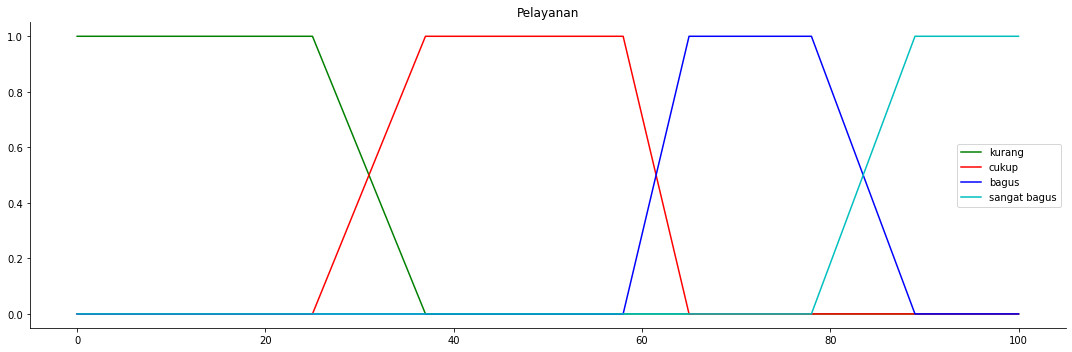

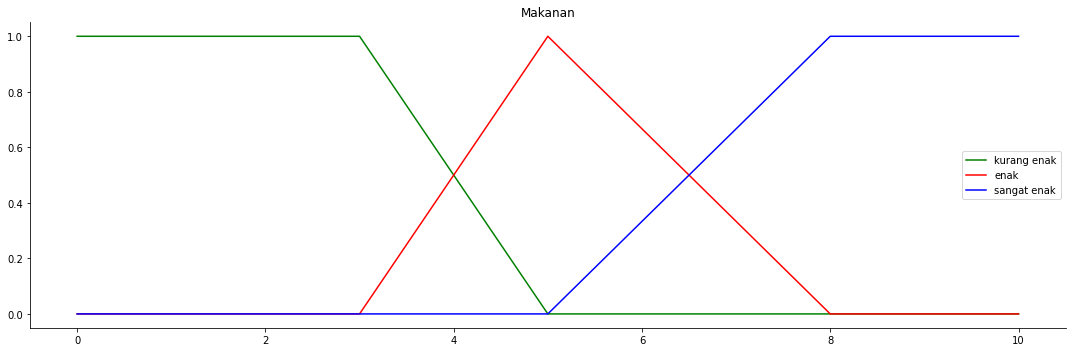

In [ ]:
grafikPelayanan()
grafikMakanan()

In [ ]:
def fuzzificationPelayanan(dataRestoran):
  hasilFuzzy = []

  for i in range(len(dataRestoran)):
    temp = keanggotaanPelayanan(dataRestoran["pelayanan"][i])
    hasilFuzzy.append(temp)
  return hasilFuzzy

def fuzzificationMakanan(dataRestoran):
  hasilFuzzy = []

  for i in range(len(dataRestoran)):
    temp = keanggotaanMakanan(dataRestoran["makanan"][i])
    hasilFuzzy.append(temp)
  return hasilFuzzy

In [ ]:
print(fuzzificationPelayanan(dataRestoran))
print(fuzzificationMakanan(dataRestoran))

[(0, 1.0, 0, 0), (0, 1, 0, 0), (0, 0, 0, 1), (0, 1, 0, 0), (1, 0, 0, 0), (0, 0.8571428571428571, 0.14285714285714285, 0), (0, 0.5714285714285714, 0.42857142857142855, 0), (0.5833333333333334, 0.4166666666666667, 0, 0), (0, 1, 0, 0), (0.08333333333333333, 0.9166666666666666, 0, 0), (1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 0.8181818181818182, 0.18181818181818182), (0.5, 0.5, 0, 0), (0, 0, 1.0, 0), (0, 0, 0.6363636363636364, 0.36363636363636365), (0, 0, 1, 0), (1, 0, 0, 0), (0, 1, 0, 0), (0, 1, 0, 0), (0, 1, 0, 0), (0, 0, 0.9090909090909091, 0.09090909090909091), (1, 0, 0, 0), (0, 0, 0, 1), (0, 0.5714285714285714, 0.42857142857142855, 0), (1, 0, 0, 0), (0, 0.8571428571428571, 0.14285714285714285, 0), (0, 1, 0, 0), (1, 0, 0, 0), (1, 0, 0, 0), (0, 0, 1, 0), (0, 1, 0, 0), (0.3333333333333333, 0.6666666666666666, 0, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0.4166666666666667, 0.5833333333333334, 0, 0), (0.5, 0.5, 0, 0), (1, 0, 0, 0), (0, 1, 0, 0), (1, 0, 0, 0), (0.3333333333333333, 0.6666666666666666, 0, 0

In [ ]:
 def inference(dataFuzzyPelayanan, dataFuzzyMakanan):
  nilaiKelayakan = []
  for i in range(len(dataFuzzyMakanan)):
    pelayanan = dataFuzzyPelayanan[i] # [0 1.0 0 0]
    makanan = dataFuzzyMakanan[i]
    rendah = []
    sedang = []
    tinggi = []
    for j in range(len(pelayanan)):
      temp = 0
      for k in range(len(makanan)):
        if j == 0 and k == 0:
          temp = min(pelayanan[j], makanan[k])
          rendah.append(temp)
        if j == 0 and k == 1:
          temp = min(pelayanan[j], makanan[k])
          rendah.append(temp)
        if j == 0 and k == 2:
          temp = min(pelayanan[j], makanan[k])
          rendah.append(temp)
        if j == 1 and k == 0:
          temp = min(pelayanan[j], makanan[k])
          rendah.append(temp)
        if j == 1 and k == 1:
          temp = min(pelayanan[j], makanan[k])
          sedang.append(temp)
        if j == 1 and k == 2:
          temp = min(pelayanan[j], makanan[k])
          sedang.append(temp)
        if j == 2 and k == 0:
          temp = min(pelayanan[j], makanan[k])
          rendah.append(temp)
        if j == 2 and k == 1:
          temp = min(pelayanan[j], makanan[k])
          sedang.append(temp)
        if j == 2 and k == 2:
          temp = min(pelayanan[j], makanan[k])
          tinggi.append(temp)
        if j == 3 and k == 0:
          temp = min(pelayanan[j], makanan[k])
          sedang.append(temp)
        if j == 3 and k == 1:
          temp = min(pelayanan[j], makanan[k])
          tinggi.append(temp)
        if j == 3 and k == 2:
          temp = min(pelayanan[j], makanan[k])
          tinggi.append(temp)
    
    nkRendah = max(rendah)
    nkSedang = max(sedang)
    nkTinggi = max(tinggi)
    nilaiKelayakan.append([nkRendah,nkSedang,nkTinggi])
  return nilaiKelayakan
        

In [ ]:
dataFuzzyPelayanan = fuzzificationPelayanan(dataRestoran)
dataFuzzyMakanan = fuzzificationMakanan(dataRestoran)
print(inference(dataFuzzyPelayanan,dataFuzzyMakanan))

[[0, 0.6666666666666666, 0], [1, 0, 0], [0, 1, 0], [0.5, 0.5, 0], [0.5, 0, 0], [0, 0.8571428571428571, 0.14285714285714285], [0, 0.5714285714285714, 0.42857142857142855], [0.5833333333333334, 0.4166666666666667, 0], [1, 0, 0], [0.08333333333333333, 0.9166666666666666, 0], [1, 0, 0], [0, 0.6666666666666666, 0], [0.8181818181818182, 0.18181818181818182, 0], [0.5, 0.5, 0], [0, 1.0, 0], [0, 0.6363636363636364, 0.36363636363636365], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 0.9090909090909091], [0.5, 0, 0], [0, 0, 1], [0, 0.5714285714285714, 0.42857142857142855], [1, 0, 0], [0, 0.8571428571428571, 0.14285714285714285], [1, 0, 0], [1, 0, 0], [0.6666666666666666, 0, 0], [0, 0, 1], [1, 0, 0], [0.3333333333333333, 0.6666666666666666, 0], [0, 0.5, 0.5], [1, 0, 0], [0.4166666666666667, 0.5833333333333334, 0], [0.5, 0.5, 0], [1, 0, 0], [0, 0.6666666666666666, 0], [0.6666666666666666, 0, 0], [0.6666666666666666, 0, 0], [0, 0, 1], [0.75, 0, 0], [0.7142857142857143, 0, 0], [1, 0, 

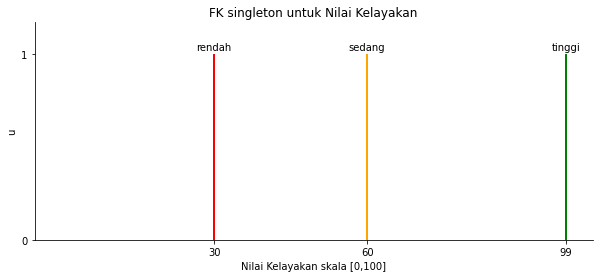

,id,pelayanan,makanan,Result
69,70,78,8,99.000000
23,24,100,9,99.000000
41,42,94,10,99.000000
21,22,79,9,99.000000
82,83,69,8,99.000000
30,31,74,9,99.000000
78,79,87,9,99.000000
68,69,86,10,99.000000
53,54,64,10,93.428571
94,95,63,8,87.857143


In [ ]:
def defuzzyfication(dataFuzzyRules):
  hasilDefuzz = []
  for data in dataFuzzyRules:
    y = ((data[0]*30) + (data[1]*60) + (data[2]*99)) / (data[0] + data[1] + data[2])
    hasilDefuzz.append(y)
  return hasilDefuzz

arrx = [0,30,60,99]
arry = [0,1,1,1]
fig, ax = plt.subplots(nrows=1, figsize=(10,4))
plt.xticks([30,60,99])
plt.yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("Nilai Kelayakan skala [0,100]")
plt.ylabel("u")
plt.margins(y=0.17)

plt.title("FK singleton untuk Nilai Kelayakan")
plt.bar(arrx, arry, color=['red','red','orange','green'],width=[0.4,0.4,0.4,0.4], label="Runtime CycleSort")

rects = ax.patches
labels = ["","rendah","sedang","tinggi"]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.0088, label,
            ha='center', va='bottom')
plt.show()

dataFuzzyRules = inference(dataFuzzyPelayanan,dataFuzzyMakanan)
hasilDefuzz = defuzzyfication(dataFuzzyRules)
dataRestoran["Result"] = hasilDefuzz

hasilAkhir = dataRestoran.sort_values(by="Result", ascending=False)[:10]
hasilAkhir

In [ ]:
peringkat = xlwt.Workbook()
ws = peringkat.add_sheet('Output')
ws.write(0,0,'Record id')
i = 1
for j in hasilAkhir["id"]:
  ws.write(i,0,j)
  i+=1
peringkat.save('peringkat.xls')